# Pose Detection with MoveNet (Transfer Learning)

In [ ]:
# install
!pip install tensorflow tensorflow_hub opencv-python

In [ ]:
# upload image
from google.colab import files

print("Please upload an image of a person...")
uploaded = files.upload()

Please upload an image of a person...


Saving photo_a.jpg to photo_a.jpg


In [ ]:
# imports
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt

In [ ]:
# load the image
file_name = list(uploaded.keys())[0]
image_raw = tf.io.read_file(file_name)
image = tf.image.decode_jpeg(image_raw, channels=3)
image = tf.image.convert_image_dtype(image, dtype=tf.uint8)

In [ ]:
# visualization
input_image_np = image.numpy()

# Load MoveNet Thunder Model from TensorFlow Hub

In [ ]:
# load the model
print("Loading MoveNet Thunder model...")

model = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
movenet = model.signatures['serving_default']

print("Model loaded!")

Loading MoveNet Thunder model...
Model loaded!


In [ ]:
# resize image to input size
resized_img = tf.image.resize_with_pad(image, 256, 256)
input_tensor = tf.cast(resized_img, dtype=tf.int32)
input_tensor = tf.expand_dims(input_tensor, axis=0)

In [ ]:
# run inference
outputs = movenet(input_tensor)
keypoints = outputs['output_0'][0][0].numpy()

# Draw Keypoints and Skeleton on the Image

In [ ]:
# define edges between keypoints
KEYPOINT_EDGE_CONNECTIONS = [
    (0, 1), (1, 3), (0, 2), (2, 4),
    (5, 7), (7, 9), (6, 8), (8, 10),
    (5, 6), (5, 11), (6, 12),
    (11, 13), (13, 15), (12, 14), (14, 16)
]

In [ ]:
def draw_keypoints(image_np, keypoints, threshold=0.3):
    image_out = image_np.copy()
    h, w, _ = image_out.shape
    keypoints_xy = []

    # keypoints
    for kp in keypoints:
        y, x, c = kp
        if c > threshold:
            cx, cy = int(x * w), int(y * h)
            keypoints_xy.append((cx, cy))
            cv2.circle(image_out, (cx, cy), 4, (0, 255, 0), -1)
        else:
            keypoints_xy.append(None)

    # skeleton
    for pt1, pt2 in KEYPOINT_EDGE_CONNECTIONS:
        if keypoints_xy[pt1] and keypoints_xy[pt2]:
            cv2.line(image_out, keypoints_xy[pt1], keypoints_xy[pt2], (255, 0, 0), 2)

    return image_out

In [ ]:
# convert RGB to BGR for OpenCV, then back to RGB for display
pose_image = draw_keypoints(input_image_np, keypoints)
pose_image_rgb = cv2.cvtColor(pose_image, cv2.COLOR_BGR2RGB)

# Display the Results

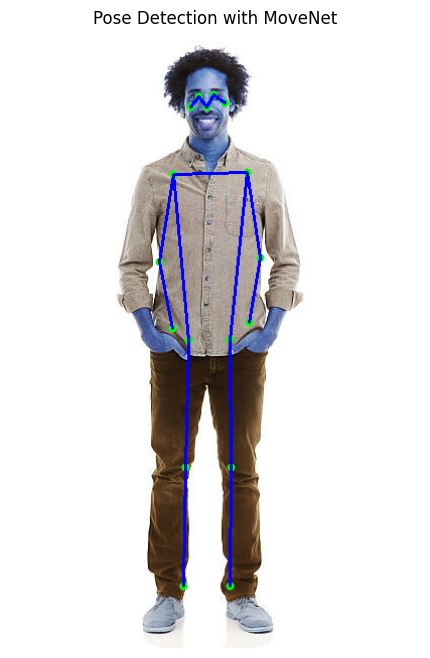

In [ ]:
# display the final image
plt.figure(figsize=(8, 8))
plt.imshow(pose_image_rgb)
plt.axis('off')
plt.title("Pose Detection with MoveNet")
plt.show()